# Example of application to real data

add script to scrap data with yahoo finance

In [81]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import seaborn as sns

In [3]:
dataset = ["vetropak","vontonbel","sig","vaudoise","bcv"]
name = "parro"
path = "./data/data_parro.xlsx"
folder_results = './results/'+name
if os.path.exists(folder_results) == False:
    os.makedirs(folder_results)

trade = pd.read_excel(path,sheet_name="trade_price")
print(trade.shape)
trade.head(5)

(1756, 3)


,Trade Count,Trade Close,Timestamp
0,4,4.13,2021-12-31 15:30:00
1,2,4.15,2021-12-31 14:00:00
2,9,4.10,2021-12-31 13:30:00
3,2,4.15,2021-12-31 13:00:00
4,2,4.11,2021-12-31 12:30:00


In [4]:
bid = pd.read_excel(path,sheet_name="bid")
print(bid.shape)
bid.head(5)

(2574, 2)


,Bid Close,Timestamp
0,4.150,2021-12-31 15:00:00
1,4.060,2021-12-31 14:30:00
2,4.055,2021-12-31 14:00:00
3,4.055,2021-12-31 13:30:00
4,4.110,2021-12-31 13:00:00


In [5]:
ask = pd.read_excel(path,sheet_name="ask")
print(ask.shape)
ask.head(5)

(2550, 2)


,Ask Close,Timestamp
0,4.250,2021-12-31 15:30:00
1,4.130,2021-12-31 15:00:00
2,4.185,2021-12-31 14:30:00
3,4.185,2021-12-31 14:00:00
4,4.100,2021-12-31 13:30:00


In [6]:
bid_ask_merge = pd.merge(bid,ask,on=["Timestamp"])
print(bid_ask_merge.shape)

(2482, 3)


In [7]:
bid_ask_merge

,Bid Close,Timestamp,Ask Close
0,4.150,2021-12-31 15:00:00,4.130
1,4.060,2021-12-31 14:30:00,4.185
2,4.055,2021-12-31 14:00:00,4.185
3,4.055,2021-12-31 13:30:00,4.100
4,4.110,2021-12-31 13:00:00,4.150
...,...,...,...
2477,5.310,2021-06-08 16:30:00,5.380
2478,5.310,2021-06-08 16:00:00,5.380
2479,5.300,2021-06-08 15:30:00,5.350
2480,5.330,2021-06-08 15:00:00,5.390


In [8]:
bid_ask_merge["midpoint"]= (bid_ask_merge["Bid Close"]+bid_ask_merge["Ask Close"])/2
bid_ask_merge

,Bid Close,Timestamp,Ask Close,midpoint
0,4.150,2021-12-31 15:00:00,4.130,4.1400
1,4.060,2021-12-31 14:30:00,4.185,4.1225
2,4.055,2021-12-31 14:00:00,4.185,4.1200
3,4.055,2021-12-31 13:30:00,4.100,4.0775
4,4.110,2021-12-31 13:00:00,4.150,4.1300
...,...,...,...,...
2477,5.310,2021-06-08 16:30:00,5.380,5.3450
2478,5.310,2021-06-08 16:00:00,5.380,5.3450
2479,5.300,2021-06-08 15:30:00,5.350,5.3250
2480,5.330,2021-06-08 15:00:00,5.390,5.3600


In [9]:
final_merged = pd.merge(bid_ask_merge,trade,on=["Timestamp"])
final_merged["bid-ask spread"] = final_merged["Ask Close"] - final_merged["Bid Close"]
final_merged

,Bid Close,Timestamp,Ask Close,midpoint,Trade Count,Trade Close,bid-ask spread
0,4.055,2021-12-31 14:00:00,4.185,4.1200,2,4.150,0.130
1,4.055,2021-12-31 13:30:00,4.100,4.0775,9,4.100,0.045
2,4.110,2021-12-31 13:00:00,4.150,4.1300,2,4.150,0.040
3,4.110,2021-12-31 12:30:00,4.185,4.1475,2,4.110,0.075
4,4.110,2021-12-31 11:30:00,4.185,4.1475,8,4.185,0.075
...,...,...,...,...,...,...,...
1686,5.310,2021-06-08 17:30:00,5.370,5.3400,16,5.340,0.060
1687,5.320,2021-06-08 17:00:00,5.360,5.3400,2,5.360,0.040
1688,5.310,2021-06-08 16:00:00,5.380,5.3450,6,5.360,0.070
1689,5.300,2021-06-08 15:30:00,5.350,5.3250,1,5.350,0.050


In [10]:
final_merged['direction_trade'] = np.where(final_merged['Trade Close']>= final_merged['midpoint'], "buy", "sell")
final_merged.head()

,Bid Close,Timestamp,Ask Close,midpoint,Trade Count,Trade Close,bid-ask spread,direction_trade
0,4.055,2021-12-31 14:00:00,4.185,4.1200,2,4.150,0.130,buy
1,4.055,2021-12-31 13:30:00,4.100,4.0775,9,4.100,0.045,buy
2,4.110,2021-12-31 13:00:00,4.150,4.1300,2,4.150,0.040,buy
3,4.110,2021-12-31 12:30:00,4.185,4.1475,2,4.110,0.075,sell
4,4.110,2021-12-31 11:30:00,4.185,4.1475,8,4.185,0.075,buy


In [11]:
data_final = final_merged[["Timestamp","Trade Close","Trade Count","direction_trade","midpoint"]]

data_final

,Timestamp,Trade Close,Trade Count,direction_trade,midpoint
0,2021-12-31 14:00:00,4.150,2,buy,4.1200
1,2021-12-31 13:30:00,4.100,9,buy,4.0775
2,2021-12-31 13:00:00,4.150,2,buy,4.1300
3,2021-12-31 12:30:00,4.110,2,sell,4.1475
4,2021-12-31 11:30:00,4.185,8,buy,4.1475
...,...,...,...,...,...
1686,2021-06-08 17:30:00,5.340,16,buy,5.3400
1687,2021-06-08 17:00:00,5.360,2,buy,5.3400
1688,2021-06-08 16:00:00,5.360,6,buy,5.3450
1689,2021-06-08 15:30:00,5.350,1,buy,5.3250


In [12]:
test = data_final.copy()
test.head(5)

,Timestamp,Trade Close,Trade Count,direction_trade,midpoint
0,2021-12-31 14:00:00,4.150,2,buy,4.1200
1,2021-12-31 13:30:00,4.100,9,buy,4.0775
2,2021-12-31 13:00:00,4.150,2,buy,4.1300
3,2021-12-31 12:30:00,4.110,2,sell,4.1475
4,2021-12-31 11:30:00,4.185,8,buy,4.1475


In [13]:
test = data_final.copy()
test["Timestamp"] = pd.to_datetime(test["Timestamp"]) # only if it isn't already
test = test.set_index("Timestamp")
agre_data = test.groupby("direction_trade").resample('D').sum()
agre_data

Trade Close  Trade Count  midpoint
direction_trade Timestamp                                     
buy             2021-06-08       26.660           34   26.5750
                2021-06-09       31.960           25   31.8650
                2021-06-10       32.260           26   32.1200
                2021-06-11       48.440           21   48.2300
                2021-06-12        0.000            0    0.0000
...                                 ...          ...       ...
sell            2021-12-27       29.005           68   29.1300
                2021-12-28       16.030           17   16.0825
                2021-12-29        6.970            9    7.0200
                2021-12-30       37.805          157   38.1500
                2021-12-31        8.275           30    8.3525

[414 rows x 3 columns]

In [14]:
buy = agre_data["Trade Count"].loc["buy"].T
sell = agre_data["Trade Count"].loc["sell"].T

In [15]:

columns = ["#buys","#sells"]
buy_and_sell = pd.merge(buy,sell,on=["Timestamp"])
buy_and_sell.columns = columns
buy_and_sell = buy_and_sell.loc[(buy_and_sell!=0).any(axis=1)]
print(buy_and_sell.shape)
buy_and_sell

(149, 2)


,#buys,#sells
Timestamp,,
2021-06-08,34,1
2021-06-09,25,56
2021-06-10,26,26
2021-06-11,21,7
2021-06-14,100,50
...,...,...
2021-12-27,38,68
2021-12-28,30,17
2021-12-29,111,9


<AxesSubplot:xlabel='Timestamp'>

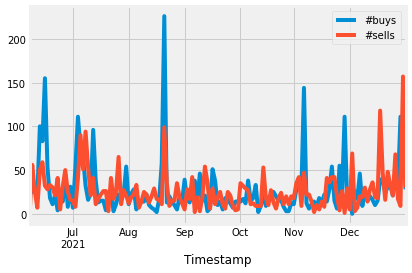

In [16]:
buy_and_sell.plot()

In [17]:
buy_and_sell.describe()

,#buys,#sells
count,149.000000,149.000000
mean,27.778523,25.879195
std,31.160406,22.250695
min,0.000000,1.000000
25%,12.000000,11.000000
50%,18.000000,20.000000
75%,30.000000,32.000000
max,226.000000,157.000000


Number of GPUs available: False
par.model.save_dir


100%|██████████| 149/149 [12:52<00:00,  5.18s/it]


<AxesSubplot:xlabel='Timestamp'>

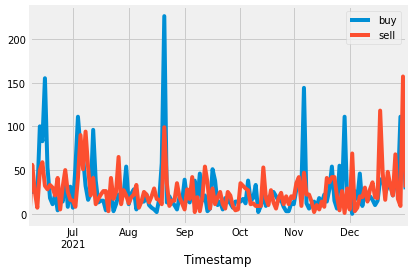

In [18]:
from model.deepsurrogate import DeepSurrogate
from tqdm import tqdm
deepsurrogate = DeepSurrogate()

columns_pin = ["buy","sell"]
buy_and_sell.columns = columns_pin
#buy_and_sell = buy_and_sell.head(50)

PIN_values = []
for i in tqdm(range(buy_and_sell.shape[0])):
    pin = deepsurrogate.get_pin(buy_and_sell.iloc[i].values)
    #print(pin)
    PIN_values.append(pin)

buy_and_sell['PIN'] = PIN_values
buy_and_sell.to_csv("test_results.csv")
buy_and_sell[["buy","sell"]].plot()

In [24]:
close_price = final_merged[['Timestamp','midpoint','bid-ask spread','Bid Close','Ask Close']]
close_price.index = close_price['Timestamp']
close_price = close_price.iloc[:,1:]
close_price = close_price.resample('D').mean()
close_price = close_price.dropna()
graph_merge = pd.merge(close_price,buy_and_sell,left_index=True,right_index=True)
graph_merge["buy-sell difference"] = np.abs(graph_merge['buy'] - graph_merge["sell"])

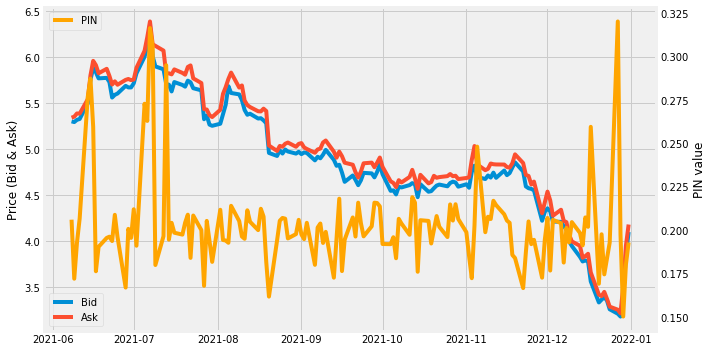

In [73]:
fig,ax = plt.subplots(figsize=(10,5))
l1, = ax.plot(graph_merge.index,graph_merge["Bid Close"],label="Bid")
ax.set_ylabel(r"Price (Bid & Ask)")
l2 = ax.plot(graph_merge.index,graph_merge["Ask Close"],label="Ask")
ax2 = ax.twinx()
l3, = ax2.plot(graph_merge.index, graph_merge.PIN,color="orange",label="PIN")
ax2.set_ylabel(r"PIN value")
ax.legend(loc="lower left")
ax2.legend(loc="upper left")
plt.xlabel(r"Date")
plt.tight_layout()

plt.grid(False)
plt.savefig(folder_results+"/bid_ask_pin_evo.png")

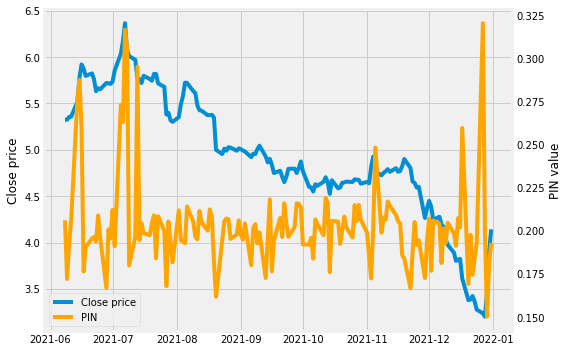

In [71]:
fig,ax = plt.subplots(figsize=(8,5))
l1, = ax.plot(graph_merge.index,graph_merge.midpoint)
ax.set_ylabel(r"Close price")
ax2 = ax.twinx()
l2, = ax2.plot(graph_merge.index, graph_merge.PIN,color="orange")
ax2.set_ylabel(r"PIN value")

plt.legend([l1, l2],["Close price", "PIN"])
plt.xlabel(r"Date")
plt.tight_layout()
plt.grid(False)
plt.savefig(folder_results+"/close_price_pin.png")

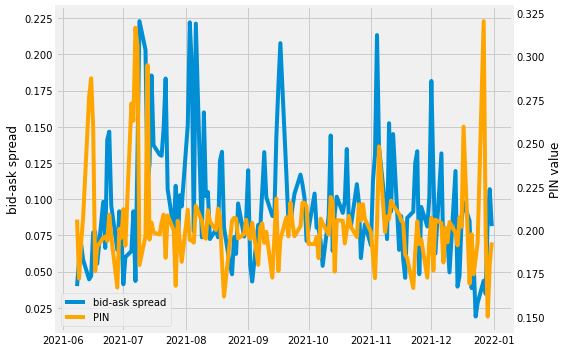

In [ ]:
fig,ax = plt.subplots(figsize=(8,5))
l1, = ax.plot(graph_merge.index,graph_merge["bid-ask spread"])
ax.set_ylabel(r"bid-ask spread")
ax2 = ax.twinx()
l2, = ax2.plot(graph_merge.index, graph_merge.PIN,color="orange")
ax2.set_ylabel(r"PIN value")

plt.legend([l1, l2],["bid-ask spread", "PIN"])
plt.xlabel(r"Date")
plt.grid(False)
plt.tight_layout()
plt.savefig(folder_results+"/bid_ask_spread_pin.png")
plt.show()


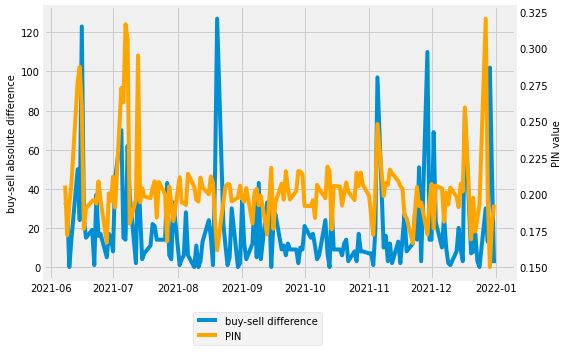

In [79]:
fig,ax = plt.subplots(figsize=(8,5))
l1, = ax.plot(graph_merge.index,graph_merge["buy-sell difference"])
ax.set_ylabel(r"buy-sell absolute difference",fontsize=10)
ax2 = ax.twinx()
l2, = ax2.plot(graph_merge.index, graph_merge.PIN,color="orange")
ax2.set_ylabel(r"PIN value",fontsize=10)

plt.legend([l1, l2],["buy-sell difference", "PIN"],bbox_to_anchor=(0.6, -0.1))
plt.xlabel(r"Date")
plt.tight_layout()
plt.grid(False)
plt.savefig(folder_results+"/buy_sell_diff_pin.png")

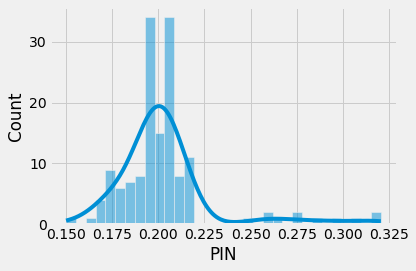

In [85]:
sns.histplot(graph_merge["PIN"],kde=True)
plt.tight_layout()
plt.savefig(folder_results+"/dist_pin.png")

<module 'matplotlib.pyplot' from '/Users/guillaume/MyProjects/master_thesis/pin-code/venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

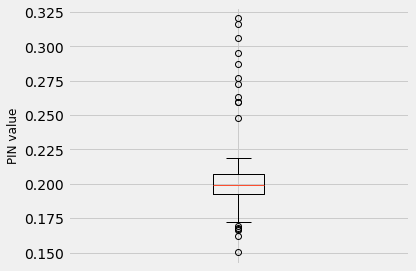

In [98]:
plt.boxplot(graph_merge["PIN"])
plt.xticks([1], [""])
plt.ylabel(r"PIN value",fontsize=12)
plt.tight_layout()
plt